# Введение в линейную регрессию

Поиск уравнения. Прогнозы

# Задание

Загрузите набор данных sandler.csv - набор данных для предсказания дохода от показа фильмов.

Столбцы Date - дата премьеры, Title - название, Genre - жанр, Studio - студия Theaters - число кинотеатров, Opening Gross - доход от премьеры, Opening Theaters - число кинотеатров для премьеры, Gross - общий доход

В качестве х возьмите: Theaters /	Opening / Opening Theaters

В качестве y - Gross

**Постройте линейную регрессию для этих данных, постарайтесь получить высокий R squared и низкие ошибки (посоревнуемся, кто сделает правильно и получит наибольший возможный R squared))**

In [1]:
# библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/sandler.csv')
df

,Date,Title,Genre,Studio,Theaters,Opening Gross,Opening Theaters,Gross
0,13.03.1992,Shakes the Clown,Comedy,IRS,9,$35 589,9,$115 103
1,23.07.1993,Coneheads,Comedy,Par.,1 978,$7 100 501,1 978,$21 274 717
2,05.08.1994,Airheads,Comedy,Fox,1 229,$1 911 739,1 228,$5 751 882
3,21.12.1994,Mixed Nuts,Comedy,Sony,1 318,$2 307 850,1 318,$6 821 850
4,10.02.1995,Billy Madison,Comedy,Uni.,1 887,$6 639 080,1 834,$25 588 734
5,16.02.1996,Happy Gilmore,Comedy,Uni.,2 069,$8 514 125,2 022,$38 824 099
6,06.09.1996,Bulletproof,Comedy,Uni.,2 242,$6 014 400,2 240,$21 576 954
7,13.02.1998,The Wedding Singer,Romantic Comedy,NL,2 837,$18 865 080,2 821,$80 245 725
8,12.06.1998,Dirty Work,Comedy,MGM,1 776,$3 634 236,1 776,$10 023 282
9,06.11.1998,The Waterboy,Comedy,BV,2 782,$39 414 071,2 664,$161 491 646


In [3]:
# сделайте предобработку - она уже прописана
df['Opening Theaters']=df['Opening Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Theaters']=df['Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Gross']=df['Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Opening Gross']=df['Opening Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df.drop(['Date','Title', 'Genre', 'Studio'], axis=1, inplace=True)
df['Opening Theaters'] = pd.to_numeric( df['Opening Theaters'])
df['Theaters'] = pd.to_numeric( df['Theaters'])
df['Gross'] = pd.to_numeric( df['Gross'])
df['Opening Gross'] = pd.to_numeric( df['Opening Gross'])
x, y = df.drop(["Gross"], axis = 1), df['Gross']
# обучите модель на x, y
# сделайте предсказание

In [4]:
df.head()

,Theaters,Opening Gross,Opening Theaters,Gross
0,9,35589,9,115103
1,1978,7100501,1978,21274717
2,1229,1911739,1228,5751882
3,1318,2307850,1318,6821850
4,1887,6639080,1834,25588734


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Theaters          31 non-null     int64
 1   Opening Gross     31 non-null     int64
 2   Opening Theaters  31 non-null     int64
 3   Gross             31 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [8]:
df.corr(method='spearman')

,Theaters,Opening Gross,Opening Theaters,Gross
Theaters,1.000000,0.891129,0.995968,0.853629
Opening Gross,0.891129,1.000000,0.879032,0.966935
Opening Theaters,0.995968,0.879032,1.000000,0.838710
Gross,0.853629,0.966935,0.838710,1.000000


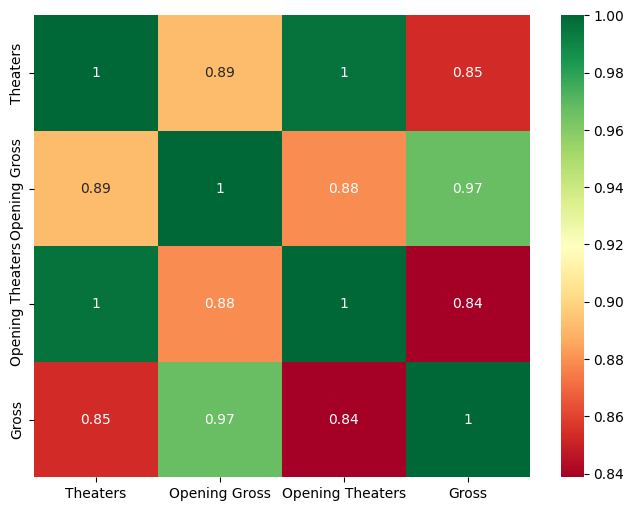

In [10]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(method='spearman'), annot = True, cmap='RdYlGn');

Gross больше всего коррелирует с Opening Gross! Больше независимых переменных не берем - риск мультиколлениарности
---



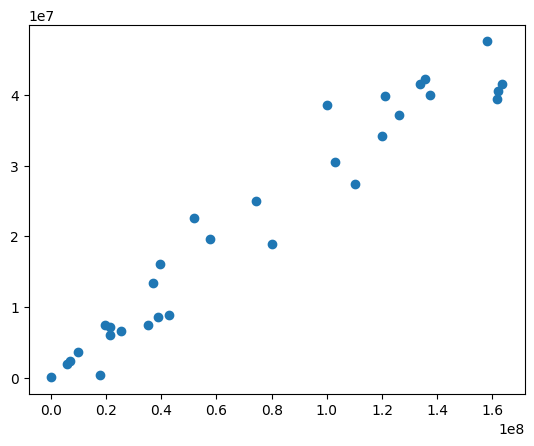

In [11]:
plt.scatter(df['Gross'], df["Opening Gross"]);

In [13]:
x = df[['Opening Gross']]
y = df['Gross']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [14]:
model = LinearRegression().fit(x_train, y_train)
print(model.intercept_)
print(model.coef_)

1501547.0663956106
[3.39726229]


In [15]:
y_pred = model.predict(x_test)

In [16]:
# Отключить научную нотацию для всего DataFrame
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [17]:
df_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_reg

,Actual,Predicted
27,103028109,105168095
15,35081594,26645181
23,100018837,132402731
17,120908074,136890049
8,10023282,13848000
9,161491646,135401484
29,36931089,47207342
24,110101975,94757403
12,57743062,68123627
0,115103,1622452


In [18]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred) # средняя разница по модулю между реальными и предсказанными значениями
meanSqErr = metrics.mean_squared_error(y_test, y_pred) # средний квадрат разницы между реальными и предсказанными значениями
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # корень из предыдущей ошибки
print('R squared: {:.2f}'.format(model.score(x,y)*100)) # процент значений, который можно описать нашим уравнением регрессии
print('Mean Absolute Error:', meanAbErr) # здесь и далее - разные способы подсчета ошибок (чем ближе к 0, тем лучше!)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 93.94
Mean Absolute Error: 12636588.814531304
Mean Square Error: 252630324869823.8
Root Mean Square Error: 15894348.834407272


Попытаемся прийти к большему R2
---

In [19]:
x = df[['Opening Gross', 'Opening Theaters']]
y = df['Gross']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [20]:
model = LinearRegression().fit(x_train, y_train)
print(model.intercept_)
print(model.coef_)

15602280.64430949
[ 3.91193024e+00 -9.72257942e+03]


In [21]:
y_pred = model.predict(x_test)

In [22]:
df_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_reg

,Actual,Predicted
27,103028109,100478072
15,35081594,23000089
23,100018837,132674758
17,120908074,136587669
8,10023282,12551857
9,161491646,143886425
29,36931089,38772856
24,110101975,87197109
12,57743062,65210715
0,115103,15653999


In [23]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred) # средняя разница по модулю между реальными и предсказанными значениями
meanSqErr = metrics.mean_squared_error(y_test, y_pred) # средний квадрат разницы между реальными и предсказанными значениями
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # корень из предыдущей ошибки
print('R squared: {:.2f}'.format(model.score(x,y)*100)) # процент значений, который можно описать нашим уравнением регрессии
print('Mean Absolute Error:', meanAbErr) # здесь и далее - разные способы подсчета ошибок (чем ближе к 0, тем лучше!)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 94.33
Mean Absolute Error: 13085403.652138906
Mean Square Error: 260630994536782.1
Root Mean Square Error: 16144069.949575357


R squared вырос, однако среди независимых переменных существует переколлинеарность
---